- ### svm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import datasets
from sklearn import svm

In [ ]:
iris = datasets.load_iris()
x_data = iris.data[:,:2]
y_data = iris.target
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                   train_size = 0.7,
                                                   test_size = 0.3,
                                                   random_state = 102) # set.seed
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc)

- ### linear

In [ ]:
clf_lin = svm.LinearSVC()
clf_lin.fit(x_train, y_train)

y_pred_lin = clf_lin.predict(x_test)

print(confusion_matrix(y_test, y_pred_lin))
print(accuracy_score(y_test, y_pred_lin))

- ### radial basis function

In [ ]:
clf_rbf = svm.SVC(kernel='rbf',gamma = 0.5)
clf_rbf.fit(x_train, y_train)

y_pred_rbf = clf_rbf.predict(x_test)


print(confusion_matrix(y_test, y_pred_rbf))
print(accuracy_score(y_test, y_pred_rbf))

- ### polynomial kernel

In [ ]:
clf_poly = svm.SVC(kernel = 'poly', degree = 3)
clf_poly.fit(x_train, y_train)

y_pred_poly = clf_poly.predict(x_test)

print(confusion_matrix(y_test, y_pred_poly))
print(accuracy_score(y_test, y_pred_poly))

### multi regression

In [2]:
import statsmodels.api as sm
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

In [4]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


- ### y variable .. i.e. target variable is boston[PRICE]

In [5]:
boston_df["PRICE"] = pd.DataFrame(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
x_data = boston_df[['CRIM','RM','LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [12]:
price = boston_df[["PRICE"]]
x_data1 = sm.add_constant(x_data, has_constant = 'add')

In [13]:
multi_model = sm.OLS(price,x_data1).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 25 May 2021   Prob (F-statistic):          1.01e-112
Time:                        20:10:32   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- ### simple regression, multi regression parameter 

In [14]:
price = boston_df[["PRICE"]]
crim = boston_df[["CRIM"]]
crim = sm.add_constant(crim, has_constant = 'add')
model1 = sm.OLS(price, crim).fit()
print(model1.params)

const    24.033106
CRIM     -0.415190
dtype: float64


In [15]:
print(multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


- residual graph

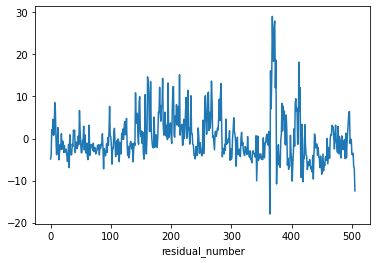

In [16]:
multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

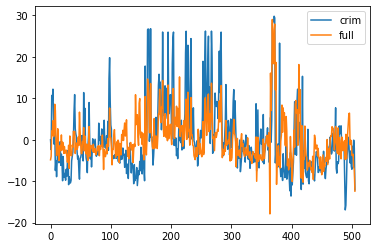

In [17]:
model1.resid.plot(label="crim")
multi_model.resid.plot(label="full")
plt.legend()
plt.show()

- 변수 간 correlcation 

In [18]:
x_data.corr()

,CRIM,RM,LSTAT
CRIM,1.000000,-0.219247,0.455621
RM,-0.219247,1.000000,-0.613808
LSTAT,0.455621,-0.613808,1.000000


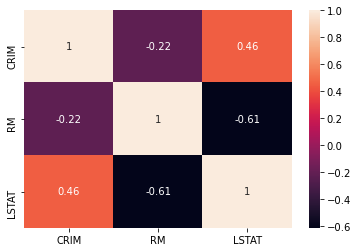

In [19]:
import seaborn as sns

sns.heatmap(x_data.corr(), annot = True)
plt.show()

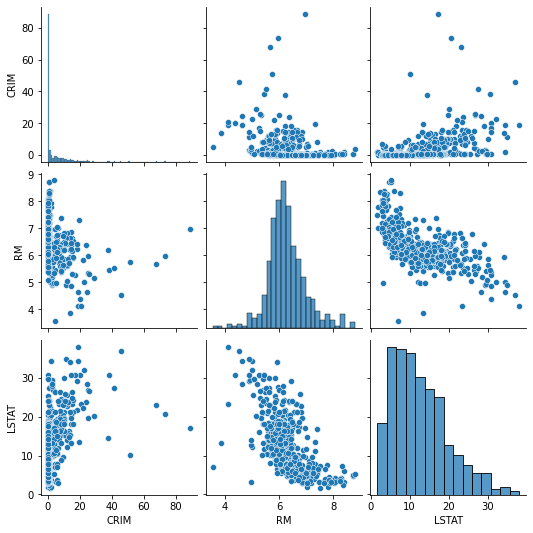

In [20]:
sns.pairplot(x_data)
plt.show()

- #### VIF를 통한 다중공선성 확인

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,1.475257,CRIM
1,3.379490,RM
2,4.167763,LSTAT


- vif 계수가 10 이상일 때 다중공선성이 존재한다고 하지만 2.5이상 넘어갈 경우 유의미하다고 판단 (본인 생각)

In [23]:
vif = pd.DataFrame()
x_data2 = x_data.drop('LSTAT',axis = 1)
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,1.151584,CRIM
1,1.151584,RM


In [26]:
x_data3 = sm.add_constant(x_data2, has_constant = 'add')
model_vif = sm.OLS(price, x_data3).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Tue, 25 May 2021   Prob (F-statistic):           5.22e-86
Time:                        20:33:28   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.2447      2.588    -11.300      0.000     -34.330     -24.160
CRIM          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
RM             8.3911      0.405     20.726      0.000       7.596       9.186
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 25 May 2021   Prob (F-statistic):          1.01e-112
Time:                        20:33:34   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
from sklearn.model_selection import train_test_split

X = x_data
y = price
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                  train_size = 0.7, test_size = 0.3,
                                                  random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 3) (152, 3) (354, 1) (152, 1)


In [30]:
x_train2 = sm.add_constant(x_train, has_constant = 'add')
fit_1 = sm.OLS(y_train,x_train2).fit()

In [31]:
x_test2 = sm.add_constant(x_test, has_constant = 'add')
fit_1.predict(x_test2)

404     5.439925
302    26.379176
465    18.944288
278    27.196242
295    28.757754
         ...    
8       9.191039
459    19.858532
165    23.326341
461    21.778478
476    19.799286
Length: 152, dtype: float64

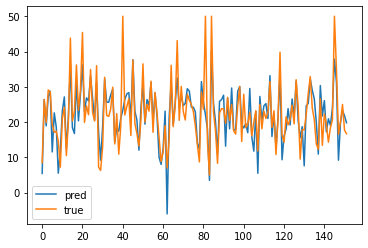

In [32]:
plt.plot(np.array(fit_1.predict(x_test2)), label = 'pred')
plt.plot(np.array(y_test), label = "true")
plt.legend()
plt.show()

In [33]:
X = x_data2
y = price
x2_train, x2_test, y2_train, y2_test = train_test_split(X, y, 
                                                       train_size = 0.7, test_size = 0.3,
                                                       random_state = 102)
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(354, 2) (152, 2) (354, 1) (152, 1)


In [34]:
x2_train2 = sm.add_constant(x2_train, has_constant = 'add')
fit_2 = sm.OLS(y2_train,x2_train2).fit()

In [35]:
x2_test2 = sm.add_constant(x2_test, has_constant = 'add')

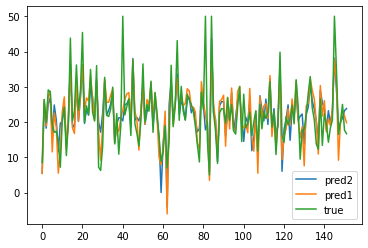

In [36]:
plt.plot(np.array(fit_2.predict(x2_test2)),label = "pred2")
plt.plot(np.array(fit_1.predict(x_test2)),label = "pred1")
plt.plot(np.array(y2_test),label = "true")
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error

In [39]:
simple = mean_squared_error(y_true = y_test['PRICE'], y_pred = fit_1.predict(x_test2))
multiple =mean_squared_error(y_true = y2_test["PRICE"], y_pred = fit_2.predict(x2_test2))
print('simple MSE : ',simple, ', multiple MSE : ', multiple)

simple MSE :  28.052043899506305 , multiple MSE :  34.72978507893944


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(x_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
mse

28.05204389950628

In [45]:
r2 = r2_score(y_test, y_pred)
r2

0.6355016044016517

In [48]:
print("절편(베타0): ", lr.intercept_)
print("회귀계수: ", lr.coef_)

절편(베타0):  [-2.1790669]
회귀계수:  [[-0.11503944  5.19512234 -0.5967032 ]]


In [51]:
X = x_data
X.columns

Index(['CRIM', 'RM', 'LSTAT'], dtype='object')

In [52]:
coeff = pd.DataFrame(lr.coef_.T, index = X.columns, columns = ["coeff"])
coeff

,coeff
CRIM,-0.115039
RM,5.195122
LSTAT,-0.596703


### logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

- #### 대출을 해줄 수 있는지 여부 판단
    - target : Personal Loan 
    
    - 데이터셋 : https://www.kaggle.com/iconoclash/personal-loan-dataset-binary-classification

In [56]:
ploan = pd.read_csv("Personal Loan.csv")
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [57]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2500 non-null   int64  
 1   Age                 2500 non-null   int64  
 2   Experience          2500 non-null   int64  
 3   Income              2500 non-null   int64  
 4   ZIP Code            2500 non-null   int64  
 5   Family              2500 non-null   int64  
 6   CCAvg               2500 non-null   float64
 7   Education           2500 non-null   int64  
 8   Mortgage            2500 non-null   int64  
 9   Personal Loan       2500 non-null   int64  
 10  Securities Account  2500 non-null   int64  
 11  CD Account          2500 non-null   int64  
 12  Online              2500 non-null   int64  
 13  CreditCard          2500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 273.6 KB


In [58]:
ploan_processed = ploan.drop(["ID","ZIP Code"], axis = 1)
ploan_processed.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [59]:
ploan_processed = sm.add_constant(ploan_processed, has_constant = 'add')

- ### data partition 

In [68]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] 

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   train_size = 0.7, test_size = 0.3,
                                                   random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [80]:
model = LogisticRegression()
results = model.fit(x_train,y_train)
results

C:\Users\EonKim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
model.score(x_test,y_test)

0.944

In [88]:
model = sm.Logit(y_train, x_train)
results = model.fit(method = "newton") 

Optimization terminated successfully.
         Current function value: 0.129622
         Iterations 9


In [89]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.6088
Time:                        20:53:56   Log-Likelihood:                -226.84
converged:                       True   LL-Null:                       -579.80
Covariance Type:            nonrobust   LLR p-value:                2.891e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0601      0.095      0.630      0.529      -0.127       0.247
CCAvg                  0.1412      0.064      2.196      0.028       0.015       0.267
CD Account             3.8711      0.567      6.827      0.000       2.760       4.982
CreditCard            -1.5362      0.358     -4.293      0.000      -2.238      -0.835
Education              1.8225      0.199      9.143      0.000       1.432       2.213
Experience            -0.0426      0.095     -0.448      0.654      -0.229       0.144
Family                 0.5957      0.123      4.859      0.000       0.355       0.836
Income                 0.0540      0.004     12.292      0.000       0.045       0.063
Mortgage              -0.0003      0.001     -0.343      0.732      -0.002       0.002
Online                -0.5070      0.262     -1.939      0.053      -1.020       0.006
Securities Account    -1.3259      0.524     -2.532      0.011      -2.352      -0.300
const                -14.9293      2.640     -5.656      0.000     -20.103      -9.755
======================================================================================
"""

In [90]:
results.params

Age                    0.060094
CCAvg                  0.141168
CD Account             3.871068
CreditCard            -1.536217
Education              1.822529
Experience            -0.042629
Family                 0.595657
Income                 0.054049
Mortgage              -0.000330
Online                -0.507031
Securities Account    -1.325944
const                -14.929306
dtype: float64

In [91]:
np.exp(results.params)

Age                   1.061936e+00
CCAvg                 1.151619e+00
CD Account            4.799360e+01
CreditCard            2.151937e-01
Education             6.187488e+00
Experience            9.582666e-01
Family                1.814222e+00
Income                1.055537e+00
Mortgage              9.996706e-01
Online                6.022809e-01
Securities Account    2.655522e-01
const                 3.283105e-07
dtype: float64

In [ ]:
results.aic

In [92]:
y_pred = results.predict(x_test)
y_pred

924     0.009612
2357    0.005326
455     0.014446
387     0.044246
343     0.003249
          ...   
2124    0.000805
2100    0.029638
893     0.000271
1669    0.000125
2218    0.000396
Length: 750, dtype: float64

In [93]:
def PRED(y, threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

Y_pred = PRED(y_pred,0.5)
Y_pred

924     0
2357    0
455     0
387     0
343     0
       ..
2124    0
2100    0
893     0
1669    0
2218    0
Length: 750, dtype: int32

In [95]:
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[663  11]
 [ 29  47]]


In [96]:
(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)

0.9466666666666667

In [97]:
def acc(cfmat) :
    acc = (cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [98]:
acc(cfmat)

0.9466666666666667

- #### 임계값에 따른 성능지표 비교

In [99]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])

for i in threshold:
    Y_pred = PRED(y_pred,i)
    cfmat = confusion_matrix(y_test, Y_pred)
    table.loc[i] = acc(cfmat)
    
table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.101333
0.1,0.861333
0.2,0.901333
0.3,0.920000
0.4,0.938667
0.5,0.946667
0.6,0.949333
0.7,0.952000
0.8,0.952000


AUC: 0.9393838825550523


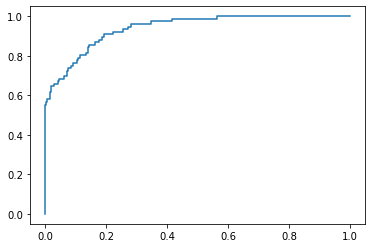

In [100]:
#fpr : false Positive rate, tpr : true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

# Print AUC
auc = np.trapz(tpr, fpr)
print('AUC:',auc)

In [105]:
metrics.roc_curve(y_test,y_pred)

(array([0.        , 0.        , 0.        , 0.00148368, 0.00148368,
        0.00593472, 0.00593472, 0.0148368 , 0.0148368 , 0.01780415,
        0.01780415, 0.01928783, 0.01928783, 0.02818991, 0.02818991,
        0.04005935, 0.04005935, 0.04451039, 0.04451039, 0.06083086,
        0.06083086, 0.06973294, 0.06973294, 0.07121662, 0.07121662,
        0.07566766, 0.07566766, 0.08308605, 0.08308605, 0.09198813,
        0.09198813, 0.10385757, 0.10385757, 0.10830861, 0.10830861,
        0.11275964, 0.11275964, 0.13204748, 0.13204748, 0.13946588,
        0.13946588, 0.14243323, 0.14243323, 0.16320475, 0.16320475,
        0.17507418, 0.17507418, 0.18694362, 0.18694362, 0.19139466,
        0.19139466, 0.22106825, 0.22106825, 0.25519288, 0.25519288,
        0.27151335, 0.27151335, 0.28041543, 0.28041543, 0.34718101,
        0.34718101, 0.41691395, 0.41691395, 0.5652819 , 0.5652819 ,
        1.        ]),
 array([0.        , 0.01315789, 0.55263158, 0.55263158, 0.56578947,
        0.56578947, 0.5789

- 회귀분석에서 나온 p-value를 기반으로 Experience, Mortgage 를 제거한 후 진행

In [106]:
feature_columns2 = list(ploan_processed.columns.difference(["Personal Loan","Experience","Mortgage"]))
X2 = ploan_processed[feature_columns2]
y2 = ploan_processed["Personal Loan"] # 대출여부 : 1 or 0

In [107]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y,
                                                   train_size = 0.7, test_size = 0.3,
                                                   random_state = 102)
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(1750, 10) (750, 10) (1750,) (750,)


In [108]:
model2 = sm.Logit(y2_train, x2_train)
results2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.129712
         Iterations 9


In [109]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.6085
Time:                        20:59:40   Log-Likelihood:                -227.00
converged:                       True   LL-Null:                       -579.80
Covariance Type:            nonrobust   LLR p-value:                4.297e-146
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.529      0.126      -0.005       0.040
CCAvg                  0.1451      0.064      2.275      0.023       0.020       0.270
CD Account             3.8552      0.565      6.827      0.000       2.748       4.962
CreditCard            -1.5299      0.356     -4.295      0.000      -2.228      -0.832
Education              1.8383      0.197      9.324      0.000       1.452       2.225
Family                 0.5945      0.122      4.872      0.000       0.355       0.834
Income                 0.0537      0.004     12.434      0.000       0.045       0.062
Online                -0.5071      0.262     -1.938      0.053      -1.020       0.006
Securities Account    -1.3225      0.523     -2.529      0.011      -2.348      -0.297
const                -13.8673      1.174    -11.810      0.000     -16.169     -11.566
======================================================================================
"""

In [110]:
y2_pred = results2.predict(x2_test)
y2_pred

924     0.009884
2357    0.005370
455     0.013954
387     0.042374
343     0.002814
          ...   
2124    0.000789
2100    0.029202
893     0.000260
1669    0.000128
2218    0.000404
Length: 750, dtype: float64

In [111]:
Y2_pred = PRED(y2_pred,0.5)
Y2_pred

924     0
2357    0
455     0
387     0
343     0
       ..
2124    0
2100    0
893     0
1669    0
2218    0
Length: 750, dtype: int32

In [112]:
cfmat2 = confusion_matrix(y_test, Y_pred)
print(cfmat2)

[[674   0]
 [ 42  34]]


In [113]:
acc(cfmat2) ## accuracy

0.944

In [114]:
threshold = np.arange(0,1,0.1)
table2 = pd.DataFrame(columns=['ACC'])

for i in threshold:
    Y2_pred = PRED(y2_pred,i)
    cfmat2 = confusion_matrix(y2_test, Y2_pred)
    table2.loc[i] = acc(cfmat2)
    
table2.index.name = 'threshold'
table2.columns.name = 'performance'
table2

performance,ACC
threshold,
0.0,0.101333
0.1,0.860000
0.2,0.902667
0.3,0.921333
0.4,0.941333
0.5,0.946667
0.6,0.949333
0.7,0.953333
0.8,0.950667


AUC: 0.939774324535374


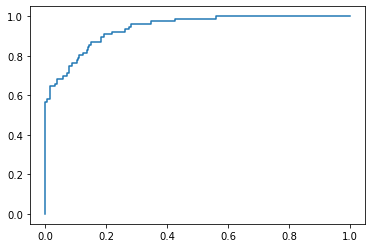

In [115]:
#fpr : false Positive rate, tpr : true positive rate
fpr2, tpr2, thresholds2 = metrics.roc_curve(y2_test, y2_pred)
plt.plot(fpr2, tpr2)

# Print AUC
auc2 = np.trapz(tpr2, fpr2)
print('AUC:',auc2)

### 회귀계수 축소법

In [122]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [123]:
ploan = pd.read_csv("Personal Loan.csv")
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [124]:
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'],axis = 1)

In [125]:
ploan_processed = sm.add_constant(ploan_processed, has_constant = 'add')
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


In [126]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed["Personal Loan"]

In [127]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   train_size = 0.7, test_size = 0.3,
                                                   random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1750, 12) (750, 12) (1750,) (750,)


- Lasso

In [117]:
lasso = Lasso(alpha=0.05) # alpha == lambda
lasso.fit(x_train,y_train)

Lasso(alpha=0.05)

In [118]:
lasso.coef_

array([ 2.64640657e-04,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.83098598e-02,  0.00000000e+00,  0.00000000e+00,  3.44215664e-03,
        2.22017801e-05, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [120]:
lasso = Lasso(alpha=0.01) # alpha == lambda
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [121]:
lasso.coef_

array([ 4.89681547e-04,  8.00850400e-03,  6.59810232e-02, -0.00000000e+00,
        7.48241892e-02,  8.81624384e-05,  2.64904770e-02,  3.49537610e-03,
        2.59297464e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [128]:
pred_y_lasso = lasso.predict(x_test) # full_model
pred_Y_lasso = PRED(pred_y_lasso,0.5)

In [129]:
cfmat = confusion_matrix(y_test, pred_Y_lasso)
print(acc(cfmat))

0.932


AUC:  0.942468374199594


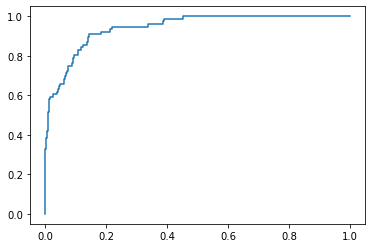

In [130]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y_lasso)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

- Ridge

In [131]:
ridge = Ridge(alpha = 0.01)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [132]:
ridge.coef_

array([-2.33494223e-03,  1.19876825e-02,  3.32565910e-01, -6.22822445e-02,
        8.65336770e-02,  2.89763096e-03,  3.22076910e-02,  3.21925053e-03,
       -7.66125755e-07, -2.51119894e-02, -7.22860187e-02,  0.00000000e+00])

In [133]:
pred_y_ridge = ridge.predict(x_test)
pred_Y_ridge = PRED(pred_y_ridge, 0.5)

In [134]:
cfmat = confusion_matrix(y_test, pred_Y_ridge)
print(acc(cfmat))

0.9453333333333334


AUC:  0.9502967359050445


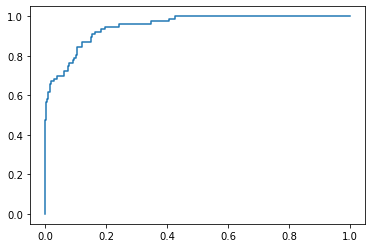

In [135]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y_ridge)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

In [136]:
# lambda*sum(beta^2) + lambda*sum(abs(beta))
elastic = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [137]:
elastic.coef_

array([ 2.32835292e-06,  1.03355555e-02,  1.55787081e-01, -1.56235823e-02,
        8.04449114e-02,  5.68583055e-04,  2.94119771e-02,  3.39182663e-03,
        1.58356349e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [138]:
pred_y_elastic = elastic.predict(x_test)
pred_Y_elastic = PRED(pred_y_elastic,0.5)

In [139]:
cfmat = confusion_matrix(y_test, pred_Y_elastic)
print(acc(cfmat))

0.9413333333333334


AUC:  0.9491058878650632


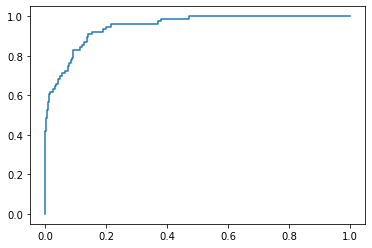

In [140]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y_elastic)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

In [141]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [142]:
data = []
acc_table = []

for i, a in enumerate(alpha):
    lasso = Lasso(alpha = a).fit(x_train, y_train)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    y_pred = lasso.predict(x_test)
    y_pred = PRED(y_pred, 0.5)
    cfmat = confusion_matrix(y_test, y_pred)
    acc_table.append((acc(cfmat)))
    
df_lasso = pd.DataFrame(data, index = alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,-0.372872,-0.405644,-0.148552,-0.117516,0.102857
1,-0.000760,0.000490,0.000000,0.000000,-0.000000
2,0.011615,0.008009,0.000000,0.000000,0.000000
3,0.298692,0.065981,0.000000,0.000000,0.000000
4,-0.053192,-0.000000,-0.000000,-0.000000,-0.000000
5,0.085012,0.074824,0.000000,0.000000,0.000000
6,0.001324,0.000088,0.000000,0.000000,-0.000000
7,0.031592,0.026490,0.000000,0.000000,0.000000
8,0.003255,0.003495,0.003359,0.002956,0.000000
9,0.000002,0.000026,0.000017,0.000000,0.000000


In [143]:
acc_table_lasso = pd.DataFrame(acc_table, index = alpha).T # T = transpose
acc_table_lasso

,0.001,0.010,0.100,1.000,10.000
0,0.944,0.932,0.892,0.898667,0.898667


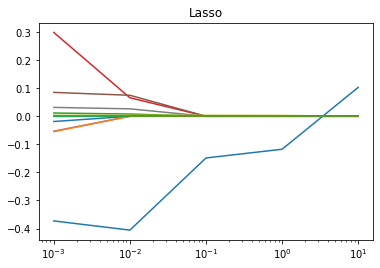

In [144]:
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")
plt.show() # 하나하나 줄들이 변수다

13일차